In [563]:
# Storing and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
plt.style.use('bmh')

# Prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [564]:
# Load the data
stock = pd.ExcelFile('BBRI.xlsx')
stock.sheet_names

['BBRI']

In [565]:
# Read the data
bbri = pd.read_excel('BBRI.xlsx', sheet_names='BBRI', parse_date='Date')
bbri = bbri.loc[:900]

In [566]:
# Show the description and information of the data
print(bbri.info())
print()
print(bbri.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    901 non-null    datetime64[ns]
 1   OPEN    901 non-null    float64       
 2   HIGH    901 non-null    float64       
 3   LOW     901 non-null    float64       
 4   CLOSE   901 non-null    float64       
 5   VOLUME  901 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 42.4 KB
None

              OPEN         HIGH          LOW        CLOSE        VOLUME
count   901.000000   901.000000   901.000000   901.000000  9.010000e+02
mean   2726.381798  2757.264151  2696.104329  2727.630411  6.139330e+16
std     576.676257   580.210337   570.673312   576.882393  8.056438e+16
min    1610.000000  1675.000000  1595.000000  1660.000000  7.120000e+10
25%    2235.000000  2265.000000  2210.000000  2240.000000  6.378950e+15
50%    2550.000000  2595.000000  254

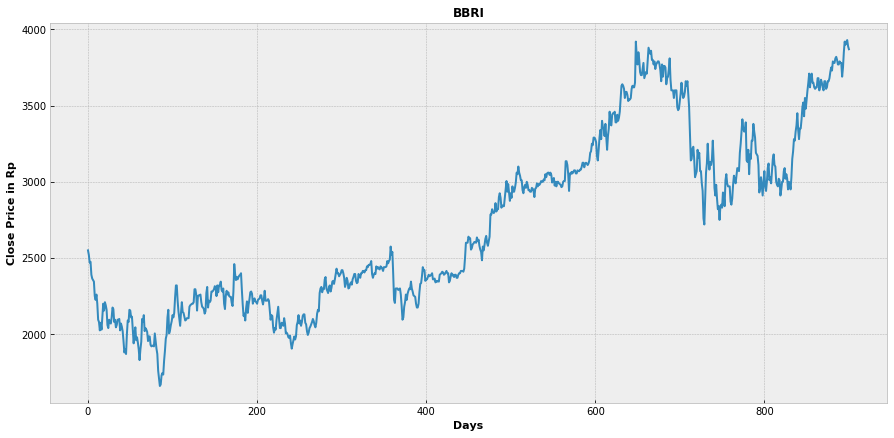

In [567]:
# Visualize the close price data
plt.figure(figsize=(15,7))
plt.plot(bbri['CLOSE'])
plt.title('BBRI', fontsize=12, fontweight='semibold')
plt.xlabel('Days', fontsize=11, fontweight='semibold')
plt.ylabel('Close Price in Rp', fontsize=11, fontweight='semibold')
plt.show()

In [568]:
# Get the close price
bbri = bbri[['CLOSE']]
bbri.head()

,CLOSE
0,2550.0
1,2520.0
2,2470.0
3,2475.0
4,2390.0


In [583]:
# Create a varibale to predict 'x' days out into the future
future_days = 20

# Create a new column as target and shifted 'x' units/days
bbri['PREDICTION'] = bbri[['CLOSE']].shift(-future_days)
bbri.tail()

,CLOSE,PREDICTION
896,3900.0,NaN
897,3920.0,NaN
898,3930.0,NaN
899,3890.0,NaN
900,3870.0,NaN


In [584]:
# Create the feature dataset (X) and convert it to numpy array and get all values except the 'x' days units/days
X = np.array(bbri.drop(['PREDICTION'], axis=1))[:-future_days]
print(X)

[[2550.]
 [2520.]
 [2470.]
 [2475.]
 [2390.]
 [2365.]
 [2355.]
 [2345.]
 [2250.]
 [2225.]
 [2260.]
 [2200.]
 [2095.]
 [2080.]
 [2025.]
 [2075.]
 [2030.]
 [2110.]
 [2200.]
 [2155.]
 [2210.]
 [2190.]
 [2160.]
 [2060.]
 [2040.]
 [2095.]
 [2075.]
 [2070.]
 [2110.]
 [2175.]
 [2165.]
 [2080.]
 [2095.]
 [2045.]
 [2060.]
 [2095.]
 [2095.]
 [2100.]
 [2025.]
 [2070.]
 [2050.]
 [2020.]
 [1955.]
 [1880.]
 [1900.]
 [1870.]
 [2000.]
 [2090.]
 [2080.]
 [2160.]
 [2155.]
 [2110.]
 [2115.]
 [2030.]
 [1940.]
 [2005.]
 [2045.]
 [1960.]
 [1980.]
 [1945.]
 [1900.]
 [1830.]
 [1900.]
 [1950.]
 [2100.]
 [2080.]
 [2125.]
 [2020.]
 [2040.]
 [2030.]
 [2015.]
 [1955.]
 [1985.]
 [1985.]
 [1930.]
 [1920.]
 [1925.]
 [1925.]
 [1920.]
 [2005.]
 [1955.]
 [1905.]
 [1870.]
 [1760.]
 [1710.]
 [1660.]
 [1670.]
 [1730.]
 [1745.]
 [1735.]
 [1825.]
 [1890.]
 [1970.]
 [1995.]
 [2110.]
 [2160.]
 [2005.]
 [2025.]
 [2060.]
 [2085.]
 [2125.]
 [2110.]
 [2140.]
 [2240.]
 [2320.]
 [2320.]
 [2220.]
 [2150.]
 [2105.]
 [2055.]
 [2140.]
 

In [585]:
# Create the target values (y) and convert it to numpy array and get all target values except the 'x' days units/days
y = np.array(bbri['PREDICTION'])[:-future_days]
print(y)

[2210. 2190. 2160. 2060. 2040. 2095. 2075. 2070. 2110. 2175. 2165. 2080.
 2095. 2045. 2060. 2095. 2095. 2100. 2025. 2070. 2050. 2020. 1955. 1880.
 1900. 1870. 2000. 2090. 2080. 2160. 2155. 2110. 2115. 2030. 1940. 2005.
 2045. 1960. 1980. 1945. 1900. 1830. 1900. 1950. 2100. 2080. 2125. 2020.
 2040. 2030. 2015. 1955. 1985. 1985. 1930. 1920. 1925. 1925. 1920. 2005.
 1955. 1905. 1870. 1760. 1710. 1660. 1670. 1730. 1745. 1735. 1825. 1890.
 1970. 1995. 2110. 2160. 2005. 2025. 2060. 2085. 2125. 2110. 2140. 2240.
 2320. 2320. 2220. 2150. 2105. 2055. 2140. 2210. 2145. 2140. 2115. 2090.
 2095. 2105. 2105. 2105. 2180. 2190. 2195. 2200. 2200. 2210. 2295. 2295.
 2260. 2155. 2250. 2255. 2255. 2260. 2210. 2180. 2175. 2165. 2135. 2150.
 2270. 2310. 2175. 2220. 2210. 2220. 2280. 2280. 2285. 2295. 2315. 2305.
 2250. 2320. 2275. 2320. 2320. 2345. 2290. 2280. 2300. 2200. 2165. 2255.
 2285. 2260. 2275. 2250. 2245. 2245. 2205. 2185. 2280. 2460. 2395. 2355.
 2375. 2360. 2375. 2385. 2390. 2400. 2290. 2195. 21

In [586]:
# Get the last 'x' rows of the feature data 
X_future = bbri.drop(['PREDICTION'], axis=1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[3620.],
       [3620.],
       [3680.],
       [3680.],
       [3600.],
       [3630.],
       [3670.],
       [3650.],
       [3620.],
       [3600.],
       [3660.],
       [3660.],
       [3610.],
       [3620.],
       [3660.],
       [3660.],
       [3680.],
       [3720.],
       [3750.],
       [3730.]])

### Linear regression model 

In [587]:
# Split the data into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

# Show the model linear regression prediction
lr_prediction = lr.predict(X_future)
print('Linear Regression Model')
print('R-Squared Score (Training): {:.3f}'.format(lr.score(X_train, y_train)))
print('R-Squared Score (Test): {:.3f}'.format(lr.score(X_test, y_test)))
print(lr_prediction)
print()

Linear Regression Model
R-Squared Score (Training): 0.896
R-Squared Score (Test): 0.884
[3632.17819591 3632.17819591 3690.81500098 3690.81500098 3612.63259422
 3641.95099675 3681.04220014 3661.49659845 3632.17819591 3612.63259422
 3671.26939929 3671.26939929 3622.40539506 3632.17819591 3671.26939929
 3671.26939929 3690.81500098 3729.90620437 3759.2246069  3739.67900521]



### Decision Tree model 

In [588]:
# Decision Tree model

# Split the data into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

tree = DecisionTreeRegressor().fit(X_train, y_train)

# Show the model decision tree regression prediction
tree_prediction = tree.predict(X_future)
print('Decision Tree Model')
print('R-Squared Score (Training): {:.3f}'.format(tree.score(X_train, y_train)))
print('R-Squared Score (Test): {:.3f}'.format(tree.score(X_test, y_test)))
print(tree_prediction)
print()

Decision Tree Model
R-Squared Score (Training): 0.948
R-Squared Score (Test): 0.848
[3808.57142857 3808.57142857 3702.5        3702.5        3468.75
 3793.33333333 3715.         3631.66666667 3808.57142857 3468.75
 3488.57142857 3488.57142857 3468.75       3808.57142857 3488.57142857
 3488.57142857 3702.5        3800.         3740.         3490.        ]



### Neural Network model  

In [589]:
# Split the data into 75% training data and 25% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

mlpreg = MLPRegressor(hidden_layer_sizes = [100,100], alpha = 10, solver = 'lbfgs').fit(X_train, y_train)

mlpreg_prediction = mlpreg.predict(X_future)
print('Neural Network')
print('R-Squared Score (Training): {:.3f}'.format(mlpreg.score(X_train, y_train)))
print('R-Squared Score (Test): {:.3f}'.format(mlpreg.score(X_test, y_test)))
print(mlpreg_prediction)

Neural Network
R-Squared Score (Training): 0.895
R-Squared Score (Test): 0.883
[3658.82617352 3658.82617352 3719.47249118 3719.47249118 3638.6107343
 3668.93389313 3709.36477157 3689.14933235 3658.82617352 3638.6107343
 3699.25705196 3699.25705196 3648.71845391 3658.82617352 3699.25705196
 3699.25705196 3719.47249118 3759.90336962 3790.22652845 3770.01108923]


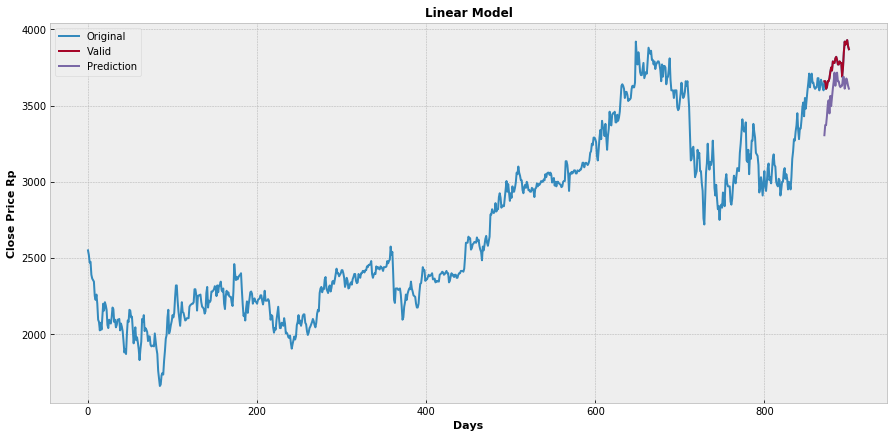

In [576]:
# Visualize the prediction using Linear Model

predictions = lr_prediction

valid = bbri[X.shape[0]:]
valid['PREDICTION'] = predictions
plt.figure(figsize=(15,7))
plt.title('Linear Model', fontsize=12, fontweight='semibold')
plt.xlabel('Days', fontsize=11, fontweight='semibold')
plt.ylabel('Close Price Rp', fontsize=11, fontweight='semibold')
plt.plot(bbri['CLOSE'])
plt.plot(valid[['CLOSE','PREDICTION']])
plt.legend(['Original','Valid','Prediction'])
plt.show()

In [577]:
# Percentage of error in linear model
valid['% Error'] = (abs(valid['PREDICTION'] - valid['CLOSE']) / valid['CLOSE']) * 100
valid_lr = valid

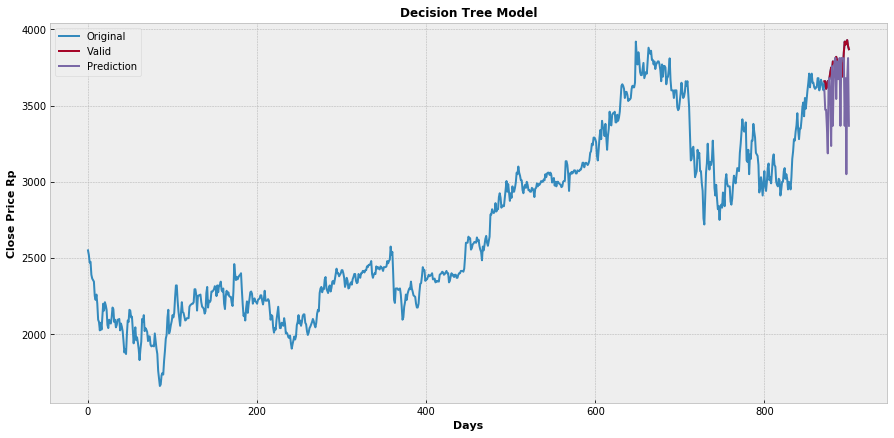

In [578]:
# Visualize the prediction using decision tree model

predictions = tree_prediction

valid = bbri[X.shape[0]:]
valid['PREDICTION'] = predictions
plt.figure(figsize=(15,7))
plt.title('Decision Tree Model', fontsize=12, fontweight='semibold')
plt.xlabel('Days', fontsize=11, fontweight='semibold')
plt.ylabel('Close Price Rp', fontsize=11, fontweight='semibold')
plt.plot(bbri['CLOSE'])
plt.plot(valid[['CLOSE','PREDICTION']])
plt.legend(['Original','Valid','Prediction'])
plt.show()

In [579]:
# Percentage of error in decision tree model
valid['% Error'] = (abs(valid['PREDICTION'] - valid['CLOSE']) / valid['CLOSE']) * 100
validdt = valid

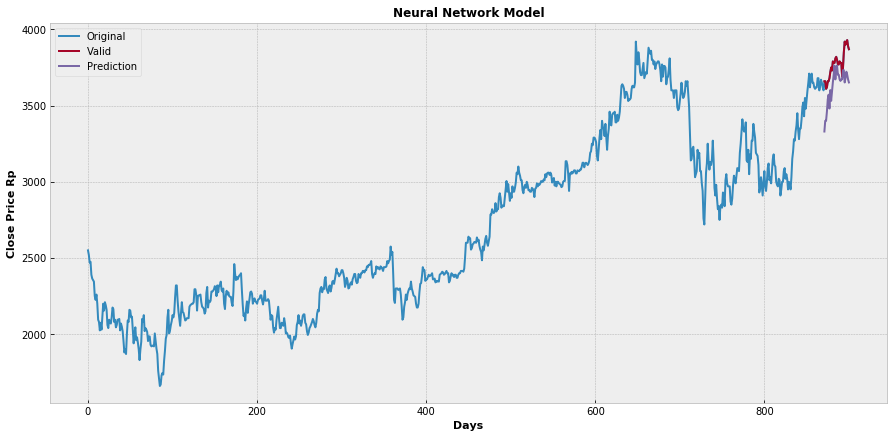

In [580]:
# Visualize the prediction using neural network model

predictions = mlpreg_prediction

valid = bbri[X.shape[0]:]
valid['PREDICTION'] = predictions
plt.figure(figsize=(15,7))
plt.title('Neural Network Model', fontsize=12, fontweight='semibold')
plt.xlabel('Days', fontsize=11, fontweight='semibold')
plt.ylabel('Close Price Rp', fontsize=11, fontweight='semibold')
plt.plot(bbri['CLOSE'])
plt.plot(valid[['CLOSE','PREDICTION']])
plt.legend(['Original','Valid','Prediction'])
plt.show()

In [581]:
# Percentage of error in neural network model
valid['% Error'] = (abs(valid['PREDICTION'] - valid['CLOSE']) / valid['CLOSE']) * 100
validmnp = valid

In [582]:
# Conclusion table of error in each model
prediction_error = valid_lr[['% Error']]
prediction_error.rename(columns={'% Error':'Linear % Error'}, inplace=True)
prediction_error['Decision Tree % Error'] = validdt[['% Error']]
prediction_error['Neural Network % Error'] = validmnp[['% Error']]
prediction_error

,Linear % Error,Decision Tree % Error,Neural Network % Error
871,9.683996,1.639344,9.016131
872,7.857172,5.122951,7.091659
873,6.580956,3.808864,5.804840
874,5.255869,7.320442,4.397274
875,4.203525,12.932605,3.242716
876,3.420601,0.000000,2.417942
877,6.281497,0.000000,5.409153
878,4.208037,5.197133,3.180376
879,6.757352,13.733333,5.833217
880,4.720929,0.804290,3.709711


## Conclusion 

BBRI stock prediction uses three models such as Linear Regression, Decision Tree, and Neural Network. The result of these predictions from Linear Regression, Decision Tree, and Neural Network in sequence are 88,4%, 84,8%, and 88,3%. In this result, I choose Linear model and Neural Network model to predict BBRI stock price, the two models that I choose because of better score compared with Decision Tree. 

Based on the error percentage, trader will prefer to choose the minimum error. From the table, the error percentage from the three modeling above shows that Decision tree more fluctuative and it is better to choose Linear Regression and Neural Network because more stable. This is because trader already set the loss, mostly around (3-5%) and the gain should be three times than the lost that trader get.

From the two parameters above, then the best model that is used to predict the BBRI stock price is Neural Network